In [104]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [ ]:
DATE_FROM = pd.Timestamp("2007-01-01")
DATE_TO = pd.Timestamp("2009-11-01")
DATE_FROM_TRAIN = pd.Timestamp("2001-01-01")

# will store metrics of all models used to compare mutually
summary_df = pd.DataFrame(
    columns=[
        "Buy & Hold Index",
        "Equal Weights Assets",
        "Market cap Adj Weights",
        "Exp. Mean reversion",
        "Sharpe optimalization"
        ],
    index=[
        "Average annual return",
        "Average daily volatility",
        "Sharpe",
        "Sortino",
    ]
)

datapath = Path.cwd() / "data"

snp = None

colnames_per_sector_filtered = []
dfs_per_sector_filtered = []
colnames_per_sector = []
dfs_per_sector = []
market_cap_dfs = []

dfs_per_sector_pf5_train = []
dfs_per_sector_pf5_test = []
colnames_per_sector_pf5 = []

for dir in datapath.iterdir():
    if dir.name == "indices":
        for symb in dir.iterdir():
            if symb.name.split('.')[0] == '^GSPC':
                df = pd.read_csv(datapath / dir / symb, index_col=0)
                df.index = pd.to_datetime(df.index)
                df = df[(DATE_FROM <= df.index) & (df.index <= DATE_TO)]
                snp = df["Close"].pct_change()
                break
        continue

    colnames_this_sector = []
    dfs_this_sector = pd.DataFrame()
    dfs_this_sector_filtered = pd.DataFrame()
    market_cap_df = pd.DataFrame()
    colnames_this_sector_pf5 = []
    dfs_this_sector_pf5_train = pd.DataFrame()
    dfs_this_sector_pf5_test = pd.DataFrame()
    colnames_this_sector_filtered = []
    for symb in dir.iterdir():
        include_pf5_df = False
        ticker = symb.name.split('.')[0]
        df = pd.read_csv(datapath / dir / symb, index_col=0)
        df.index = pd.to_datetime(df.index)
        
        df_train = df[(DATE_FROM_TRAIN <= df.index) & (df.index <= DATE_FROM)]
        if len(df_train) == 1507:
            include_pf5_df = True

        df = df[(DATE_FROM <= df.index) & (df.index <= DATE_TO)]
        if len(df.index) < 714:
            #print('symb error')
            #print(len(df.index))
            continue

        returns = df["Close"].pct_change()

        if include_pf5_df:
            dfs_this_sector_pf5_train[ticker] = df_train["Close"].pct_change()
            dfs_this_sector_pf5_test[ticker] = returns
            colnames_this_sector_pf5.append(ticker)
        
        colnames_this_sector.append(ticker)
        dfs_this_sector[ticker] = returns
        if "MarketCap" in df.columns:
            colnames_this_sector_filtered.append(ticker)
            dfs_this_sector_filtered[ticker] = returns
            market_cap_df[ticker] = df["MarketCap"]
    
    dfs_per_sector_filtered.append(dfs_this_sector_filtered)
    dfs_per_sector.append(dfs_this_sector)
    colnames_per_sector.append(colnames_this_sector)
    colnames_per_sector_filtered.append(colnames_this_sector_filtered)
    market_cap_dfs.append(market_cap_df)

    dfs_per_sector_pf5_train.append(dfs_this_sector_pf5_train)
    dfs_per_sector_pf5_test.append(dfs_this_sector_pf5_test)
    colnames_per_sector_pf5.append(colnames_this_sector_pf5)
    
all_returns_df = pd.DataFrame(index=snp.index)

for k in colnames_per_sector_pf5:
    print(k)


['CCL', 'CMCSA', 'DIS', 'EA', 'IPG', 'OMC', 'SIRI', 'T', 'VZ']
['AMZN', 'BKNG', 'CAR', 'DIS', 'F', 'HD', 'LOW', 'MAR', 'MCD', 'MNST', 'NKE', 'ROST', 'SBUX', 'TGT', 'VFC', 'YUM']
['ADM', 'CL', 'COST', 'EL', 'GIS', 'HSY', 'KMB', 'KO', 'MKC', 'MO', 'PEP', 'PG', 'SJM', 'STZ', 'TSN', 'WMT']
['APA', 'BKR', 'COP', 'CVX', 'EOG', 'HAL', 'NOV', 'OKE', 'OXY', 'SLB', 'VLO', 'WMB', 'XOM']
['AIG', 'ALL', 'AXP', 'BAC', 'BLK', 'C', 'GS', 'JPM', 'MET', 'MS', 'PNC', 'SCHW', 'SPGI', 'TFC', 'USB', 'WFC']
['ABT', 'AMGN', 'BIIB', 'BMY', 'CVS', 'DHR', 'GILD', 'ISRG', 'JNJ', 'LLY', 'MDT', 'MRK', 'PFE', 'REGN', 'TMO', 'UNH', 'VRTX']
['AOS', 'BA', 'CAT', 'CSX', 'DE', 'EMR', 'EXPD', 'FDX', 'GD', 'GE', 'HON', 'ITW', 'LMT', 'MMM', 'PH', 'REG', 'RHI', 'SWK', 'WM']
['AAPL', 'ADBE', 'ADI', 'AMD', 'CSCO', 'IBM', 'INTC', 'KLAC', 'LRCX', 'MSFT', 'MU', 'NVDA', 'ORCL', 'QCOM', 'TXN', 'ZBRA']
['ALB', 'APD', 'DD', 'ECL', 'EMN', 'FMC', 'IFF', 'LIN', 'MLM', 'MOS', 'NEM', 'NUE', 'PPG', 'SHW', 'VMC']
['AMT', 'AVB', 'BXP', 'CCI'

### Strategy 1 - Equal weights

[            nan  1.05348000e-03 -7.83140093e-03  7.80868895e-04
  1.62543466e-03  5.80382506e-03  7.70058346e-03  6.41186234e-03
  1.84241604e-03  3.29123616e-04 -5.96461928e-03  5.25970556e-03
 -5.13535622e-03  5.21714138e-03  8.19423281e-03 -1.04307771e-02
 -1.61723899e-04  8.48763121e-04  5.52728845e-03  7.41706138e-03
  7.01036765e-03  2.87867560e-03 -1.81640634e-03  3.17715705e-03
  3.86470051e-03 -5.03221218e-04 -6.48199083e-03 -3.36565388e-03
  8.93182252e-03  7.38507568e-03  9.73504124e-04  6.29382732e-04
  6.17484370e-03  1.12372032e-03 -5.62784786e-04 -1.85337578e-03
 -1.00788611e-03 -3.42482712e-02  4.86851148e-03 -3.49249338e-03
 -1.45097994e-02 -1.26603236e-02  1.89053826e-02 -1.46134849e-03
  9.63728381e-03  2.40309534e-03  4.61178604e-03 -2.00233936e-02
  5.74115066e-03  4.42102345e-03 -5.17461332e-03  1.14234858e-02
  7.11659916e-03  1.65227946e-02  6.98065687e-04  1.39085146e-03
 -8.82865266e-04 -5.26636224e-03 -6.01779648e-03  2.71231763e-03
 -1.28681410e-06  5.17555

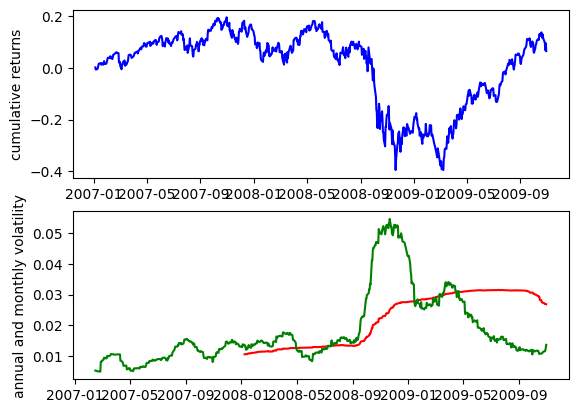

In [115]:
num_rows = len(dfs_per_sector[0])
num_sectors = len(dfs_per_sector)
returns_vector = np.zeros(num_rows)
for return_df in dfs_per_sector:
    mean_returns = return_df.mean(axis=1) # equal weights within one sector
    returns_vector += mean_returns.values

returns_vector /= num_sectors
print(returns_vector)


pf1 = pd.DataFrame({
    "pf_daily_returns": returns_vector,
    }, index=dfs_per_sector[0].index)

pf1["pf_cum_returns"] = (1 + pf1["pf_daily_returns"]).cumprod() - 1
pf1["ann_volatility"] = pf1["pf_daily_returns"].rolling(255).std()
pf1["mon_volatility"] = pf1["pf_daily_returns"].rolling(30).std()

print(pf1)

fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(pf1.index, pf1["pf_cum_returns"], color="blue", label="cumulative_returns")
ax1.set_ylabel('cumulative returns')

ax2.plot(pf1.index, pf1["ann_volatility"], color="red", label="ann_volatility")
ax2.plot(pf1.index, pf1["mon_volatility"], color="green", label="mon_volatility")
ax2.set_ylabel('annual and monthly volatility')

risk_free = 0.0
sharpe = (pf1["pf_daily_returns"].mean() * 255 - risk_free) / (pf1["pf_daily_returns"].std() * np.sqrt(255))
sortino = (pf1["pf_daily_returns"].mean() * 255 - risk_free) / (pf1[pf1["pf_daily_returns"] < 0]["pf_daily_returns"].std() * np.sqrt(255))

avg_daily_vola = pf1["pf_daily_returns"].std()
avg_ann_return = pf1["pf_daily_returns"].mean() * 255

print('sharpe:', sharpe)
print('sortino:', sortino)
print('average daily volatility:', avg_daily_vola)
print('average annual return:', avg_ann_return)

summary_df["Equal Weights Assets"] = [avg_ann_return, avg_daily_vola, sharpe, sortino]
print(summary_df["Equal Weights Assets"])

all_returns_df["Equal Weights Assets"] = pf1["pf_cum_returns"]

plt.show()

### Strategy 2 - Buy & Hold the S&P500

sharpe: -0.20870718976698166
sortino: -0.2691686531296432
average daily volatility: 0.01930287596125403
average annual return: -0.06433236547424453
Average annual return      -0.064332
Average daily volatility    0.019303
Sharpe                     -0.208707
Sortino                    -0.269169
Name: Buy & Hold Index, dtype: float64


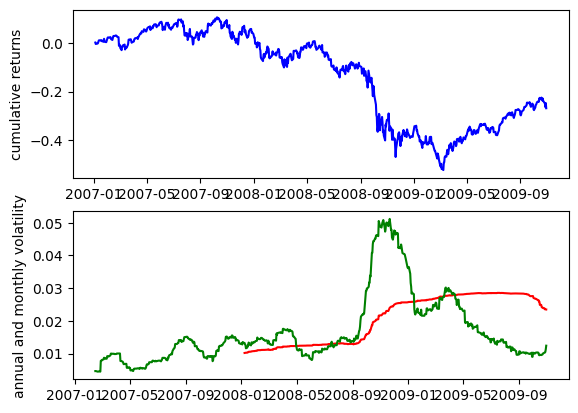

In [113]:
pf2 = pd.DataFrame({
    "pf_daily_returns": snp,
    "pf_cum_returns": (1 + snp).cumprod() - 1,
    "ann_volatility": snp.rolling(255).std(),
    "mon_volatility": snp.rolling(30).std()
    }, index=snp.index)

fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(pf1.index, pf2["pf_cum_returns"], color="blue", label="cumulative_returns")
ax1.set_ylabel('cumulative returns')

ax2.plot(pf1.index, pf2["ann_volatility"], color="red", label="ann_volatility")
ax2.plot(pf1.index, pf2["mon_volatility"], color="green", label="mon_volatility")
ax2.set_ylabel('annual and monthly volatility')

import numpy as np

risk_free = 0.0
sharpe = (pf2["pf_daily_returns"].mean() * 255 - risk_free) / (pf2["pf_daily_returns"].std() * np.sqrt(255))
sortino = (pf2["pf_daily_returns"].mean() * 255 - risk_free) / (pf2[pf2["pf_daily_returns"] < 0]["pf_daily_returns"].std() * np.sqrt(255))
avg_ann_return = pf2["pf_daily_returns"].mean() * 255
avg_daily_vola = pf2["pf_daily_returns"].std()

print('sharpe:', sharpe)
print('sortino:', sortino)
print('average daily volatility:', avg_daily_vola)
print('average annual return:', avg_ann_return)

summary_df["Buy & Hold Index"] = [avg_ann_return, avg_daily_vola, sharpe, sortino]
print(summary_df["Buy & Hold Index"])

all_returns_df["Buy & Hold Index"] = pf2["pf_cum_returns"]

plt.show()

### Strategy 3 - Market cap adjusted weights  

714
714
Date
2007-01-03    0.000000
2007-01-04    0.002868
2007-01-05   -0.006873
2007-01-08   -0.001188
2007-01-09    0.001969
                ...   
2009-10-26   -0.006718
2009-10-27   -0.004654
2009-10-28   -0.018870
2009-10-29    0.021947
2009-10-30   -0.025988
Length: 714, dtype: float64
DatetimeIndex(['2007-01-03', '2007-01-04', '2007-01-05', '2007-01-08',
               '2007-01-09', '2007-01-10', '2007-01-11', '2007-01-12',
               '2007-01-16', '2007-01-17',
               ...
               '2009-10-19', '2009-10-20', '2009-10-21', '2009-10-22',
               '2009-10-23', '2009-10-26', '2009-10-27', '2009-10-28',
               '2009-10-29', '2009-10-30'],
              dtype='datetime64[ns]', name='Date', length=714, freq=None)
            pf_daily_returns  pf_cum_returns  ann_volatility  mon_volatility
Date                                                                        
2007-01-03          0.000000        0.000000             NaN             NaN
2007-01-04 

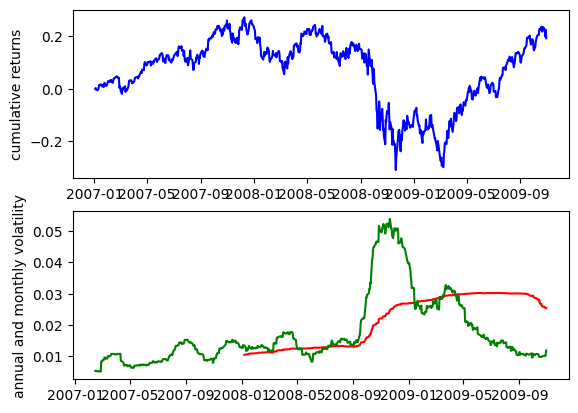

In [108]:

num_sectors_with_marketcap = len(colnames_per_sector_filtered)

pf_returns = np.zeros(num_rows)
for market_cap_df, ticker_names, returns_df in zip(
    market_cap_dfs, colnames_per_sector_filtered, dfs_per_sector_filtered
    ):
    sum_market_caps = market_cap_df.sum(axis=1)
    weight_matrix = market_cap_df.div(sum_market_caps, axis=0)
    weight_matrix /= num_sectors_with_marketcap
    this_sector_return = (weight_matrix * returns_df).sum(axis=1)
    pf_returns += this_sector_return.values

pf_returns = pd.Series(pf_returns, index=returns_df.index)
print(len(pf_returns))
print(len(returns_df))
print(pf_returns)
print(returns_df.index)
pf3 = pd.DataFrame({
    "pf_daily_returns": pf_returns,
    "pf_cum_returns": (1 + pf_returns).cumprod() - 1,
    "ann_volatility": pf_returns.rolling(255).std(),
    "mon_volatility": pf_returns.rolling(30).std(),
    }, index=pf_returns.index)

print(pf3)

fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(pf3.index, pf3["pf_cum_returns"], color="blue", label="cumulative_returns")
ax1.set_ylabel('cumulative returns')

ax2.plot(pf1.index, pf3["ann_volatility"], color="red", label="ann_volatility")
ax2.plot(pf1.index, pf3["mon_volatility"], color="green", label="mon_volatility")
ax2.set_ylabel('annual and monthly volatility')

import numpy as np

risk_free = 0.0
sharpe = (pf3["pf_daily_returns"].mean() * 255 - risk_free) / (pf3["pf_daily_returns"].std() * np.sqrt(255))
sortino = (pf3["pf_daily_returns"].mean() * 255 - risk_free) / (pf3[pf3["pf_daily_returns"] < 0]["pf_daily_returns"].std() * np.sqrt(255))
avg_daily_vola = pf3["pf_daily_returns"].std()
avg_ann_return = pf3["pf_daily_returns"].mean() * 255
print('sharpe:', sharpe)
print('sortino:', sortino)
print('average daily volatility:', avg_daily_vola)
print('average annual return:', avg_ann_return)

summary_df["Market cap Adj Weights"] = [avg_ann_return, avg_daily_vola, sharpe, sortino]

all_returns_df["Market cap Adj Weights"] = pf3["pf_cum_returns"]

plt.show()

### Strategy 4 - (Experimental) mean-reversion  

In [109]:
PERIOD = 30
rel_momentum_dfs = []

for returns in dfs_per_sector:
    rel_momentum = pd.DataFrame()
    for col in returns.columns:
        rolling_max = returns[col].rolling(PERIOD, min_periods=10).max()
        rolling_min = returns[col].rolling(PERIOD, min_periods=10).min()
        rel_mom = (returns[col] - rolling_min) / (rolling_max - rolling_min)
        rel_momentum[col] = rel_mom
    rel_momentum_dfs.append(rel_momentum)

rolling_max = snp.rolling(PERIOD, min_periods=10).max()
rolling_min = snp.rolling(PERIOD, min_periods=10).min()
rel_momentum_snp = (snp - rolling_min) / (rolling_max - rolling_min + 1e-08)

norm_weights_matrix = []

for rel_df in rel_momentum_dfs:
    weights = rel_df.rdiv(rel_momentum_snp, axis=0)
    sum_weights = weights.sum(axis=1)
    res_weights = weights.div(sum_weights, axis=0).div(num_sectors)
    norm_weights_matrix.append(res_weights)

returns_vector = np.zeros(norm_weights_matrix[0].shape[0])
for returns, weight_m in zip(dfs_per_sector, norm_weights_matrix):
    r = (returns * weight_m).sum(axis=1).values
    returns_vector += r

print(returns_vector)


[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.53658717e-03  3.23711198e-03
 -6.86052308e-04  1.98961301e-03  1.26345546e-03  0.00000000e+00
 -4.46342407e-03 -1.28312691e-03  1.08144390e-03  3.89397718e-03
  3.29129369e-03  3.93859450e-04 -4.87390093e-03  1.12259572e-03
 -1.34159059e-04 -5.52383993e-04 -4.75644265e-03 -4.95429135e-03
  5.82062438e-03  4.01138064e-03 -3.18266556e-05 -7.30182057e-04
  2.45668974e-03 -2.98044623e-04 -1.05556471e-03 -1.77127080e-03
 -1.11588555e-03  0.00000000e+00 -5.01543897e-04 -4.82986367e-03
 -2.08711158e-02 -8.71901388e-03  1.80313646e-02 -2.71783929e-03
  6.38929886e-03  3.40687198e-04  2.47786698e-03 -3.07128148e-03
  2.55054812e-03  2.86635561e-03 -7.50014742e-03  1.00965628e-02
  5.19726460e-03  1.44860181e-02 -2.50606130e-03 -1.38760993e-04
 -2.47311467e-03 -6.75324362e-03 -8.82342032e-03 -1.93368819e-04
 -1.57646966e-03  2.18232

714
714
sharpe: 0.9673375848108633
sortino: 1.7624523037037072
average daily volatility: 0.014648435826738068
average annual return: 0.22627647530790196


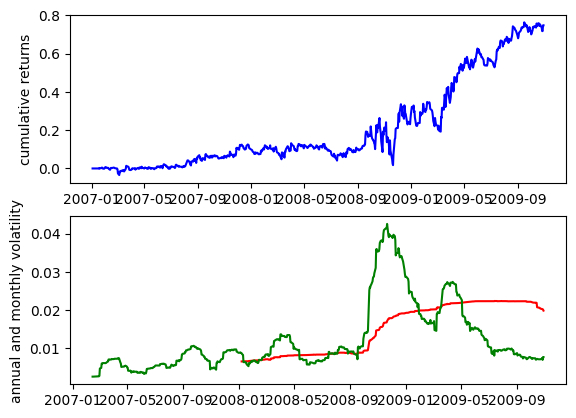

In [110]:
returns_vector = pd.Series(returns_vector, index=norm_weights_matrix[0].index)
print(len(returns_vector))
print(len(norm_weights_matrix[0].index))

pf4 = pd.DataFrame({
    "pf_daily_returns": returns_vector,
    "pf_cum_returns": (1 + returns_vector).cumprod() - 1,
    "ann_volatility": returns_vector.rolling(255).std(),
    "mon_volatility": returns_vector.rolling(30).std()
    }, index=norm_weights_matrix[0].index)

fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(pf4.index, pf4["pf_cum_returns"], color="blue", label="cumulative_returns")
ax1.set_ylabel('cumulative returns')

ax2.plot(pf4.index, pf4["ann_volatility"], color="red", label="ann_volatility")
ax2.plot(pf4.index, pf4["mon_volatility"], color="green", label="mon_volatility")
ax2.set_ylabel('annual and monthly volatility')

risk_free = 0.0
sharpe = (pf4["pf_daily_returns"].mean() * 255 - risk_free) / (pf4["pf_daily_returns"].std() * np.sqrt(255))
sortino = (pf4["pf_daily_returns"].mean() * 255 - risk_free) / (pf4[pf4["pf_daily_returns"] < 0]["pf_daily_returns"].std() * np.sqrt(255))
avg_daily_vola = pf4["pf_daily_returns"].std()
avg_ann_return = pf4["pf_daily_returns"].mean() * 255
print('sharpe:', sharpe)
print('sortino:', sortino)
print('average daily volatility:', avg_daily_vola)
print('average annual return:', avg_ann_return)

summary_df["Exp. Mean reversion"] = [avg_ann_return, avg_daily_vola, sharpe, sortino]

all_returns_df["Exp. Mean reversion"] = pf4["pf_cum_returns"]

plt.show()

### Strategy 5 - Asset weight determination using sharpe ratio optimalization  

sharpe: 0.29153563110435077
sortino: 0.41068448251578255
average daily volatility: 0.02523429502923959
average annual return: 0.11747701632708517


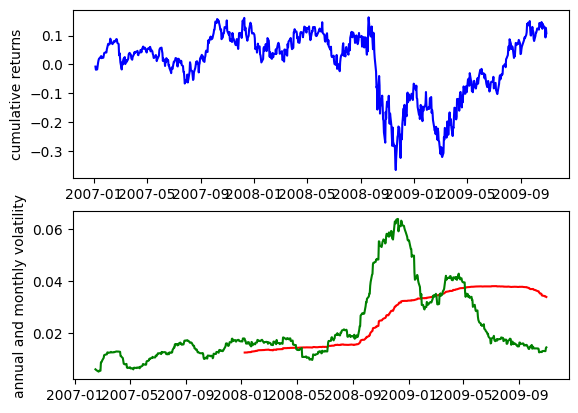

In [111]:
from scipy.optimize import minimize

BOOTSTRAP_WINDOW = 365
num_rows_train = len(dfs_per_sector_pf5_train[0])
num_rows_test = len(dfs_per_sector_pf5_test[0])

def optimize(df_section, risk_free=0):
    # df_section is a dataframe of length BOOTSTRAP_WINDOW with the columns being all the assets
    cov = np.cov(df_section, rowvar=False)
    mean_returns = df_section.mean(axis=0)

    n_assets = len(mean_returns)

    constraints = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})
    bounds = tuple((0, 1) for _ in range(n_assets))

    def sharpe_performance(weights):
        return (np.dot(mean_returns, weights) - risk_free) / np.sqrt(weights.T @ cov @ weights)

    def neg_sharpe(weights):
        return -sharpe_performance(weights)

    x0 = np.ones(n_assets) / n_assets
    
    return minimize(neg_sharpe, x0, method='SLSQP', bounds=bounds, constraints=constraints).x

all_returns_test = np.empty((num_rows_test, sum([len(rdf.columns) for rdf in dfs_per_sector_pf5_test])))
all_returns_train = np.empty((num_rows_train, sum([len(rdf.columns) for rdf in dfs_per_sector_pf5_train])))

i = 0
for pf5_train, pf5_test in zip(dfs_per_sector_pf5_train, dfs_per_sector_pf5_test):
    for col in pf5_train.columns:
        all_returns_train[:,i] = pf5_train[col]
        all_returns_test[:,i] = pf5_test[col]
        i += 1

all_returns_train = pd.DataFrame(all_returns_train, index=dfs_per_sector_pf5_train[0].index).iloc[1:]
all_returns_test = pd.DataFrame(all_returns_test, index=dfs_per_sector_pf5_test[0].index).iloc[1:]

resulting_weights = []

for idx in range(BOOTSTRAP_WINDOW, num_rows_train, BOOTSTRAP_WINDOW):
    df_section = all_returns_train.iloc[:idx]
    #print('df section'); print(df_section)
    weights = optimize(df_section)
    #print('current weights:', weights)
    resulting_weights.append(weights)

resulting_weights = np.array(resulting_weights)
final_weights = resulting_weights.mean(axis=0)

ret = np.matmul(all_returns_test.values, final_weights)

ret = pd.Series(ret, index=all_returns_test.index)

pf5 = pd.DataFrame({
    'pf_daily_returns': ret,
    'pf_cum_returns': (1 + ret).cumprod() - 1,
    'ann_volatility': ret.rolling(255).std(),
    'mon_volatility': ret.rolling(30).std()
})

fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(pf5.index, pf5["pf_cum_returns"], color="blue", label="cumulative_returns")
ax1.set_ylabel('cumulative returns')

ax2.plot(pf5.index, pf5["ann_volatility"], color="red", label="ann_volatility")
ax2.plot(pf5.index, pf5["mon_volatility"], color="green", label="mon_volatility")
ax2.set_ylabel('annual and monthly volatility')

import numpy as np

risk_free = 0.0
sharpe = (pf5["pf_daily_returns"].mean() * 255 - risk_free) / (pf5["pf_daily_returns"].std() * np.sqrt(255))
sortino = (pf5["pf_daily_returns"].mean() * 255 - risk_free) / (pf5[pf5["pf_daily_returns"] < 0]["pf_daily_returns"].std() * np.sqrt(255))
avg_daily_vola = pf5["pf_daily_returns"].std()
avg_ann_return = pf5["pf_daily_returns"].mean() * 255
print('sharpe:', sharpe)
print('sortino:', sortino)
print('average daily volatility:', avg_daily_vola)
print('average annual return:', avg_ann_return)

summary_df["Sharpe optimalization"] = [avg_ann_return, avg_daily_vola, sharpe, sortino]

all_returns_df["Sharpe optimalization"] = pf5["pf_cum_returns"]

plt.show()




                          Buy & Hold Index  Equal Weights Assets  \
Average annual return            -0.064332              0.078680   
Average daily volatility          0.019303              0.021053   
Sharpe                           -0.208707              0.234040   
Sortino                          -0.269169              0.306688   

                          Market cap Adj Weights  Exp. Mean reversion  \
Average annual return                   0.114973             0.226276   
Average daily volatility                0.020288             0.014648   
Sharpe                                  0.354880             0.967338   
Sortino                                 0.472759             1.762452   

                          Sharpe optimalization  
Average annual return                  0.117477  
Average daily volatility               0.025234  
Sharpe                                 0.291536  
Sortino                                0.410684  


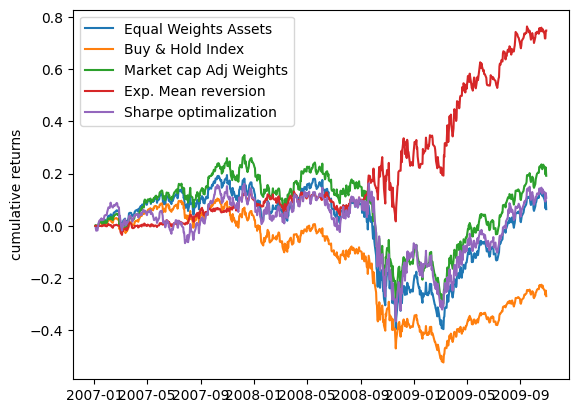

In [116]:
print(summary_df)

fig, ax = plt.subplots()

for colname in all_returns_df.columns:
    ax.plot(all_returns_df.index, all_returns_df[colname], label=colname)

ax.set_ylabel('cumulative returns')
ax.legend()

plt.show()

### Conclusion
In this backtest simulation where I'm only considering the market regime of a bear market, it is remarkable to see that the experimental mean-reversion strategy heavily outperformed the other approaches, and also barely went into drawdown during the crash, like I also saw in the main testing notebook. Holding the general market heavily underperformed the others in this time period.

The fact that the equal-weights across stocks, Sharpe ratio optimalization and market-cap adjusted weights outperformed buying & holding the general market, mainly shortly after the crash, I believe is due to the bigger companies rallying the most after the period of negative returns during the big downturn. This might be due to the bigger companies being less volatile and more stable in general and having more trust after the crash to have the ability to recover, however this is what I think is feasible.
